In [287]:
#Preparation
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats

In [323]:
#Data cleaning
%matplotlib inline
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False # remove the top and the right side borders to avoid junk lines


SyntaxError: invalid syntax (<ipython-input-323-2866341fa93b>, line 5)

In [307]:
#Import data
df = pd.read_csv("/Users/phyllis/Documents/UTD/20 Fall/6321 Advanced Statistical Methods/Assignment/HW5/sample_data.csv",header=[0])
df.set_index('day', inplace = True) #set the first column as index
df.columns = ['Fund A','Fund B'] #set two columns' names for two fund managers

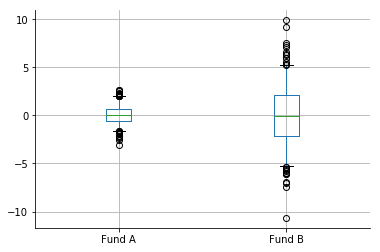

In [346]:
# Q1 (a)
boxplot = df.boxplot(column=['Fund A','Fund B'],whis=[5,95],meanline=True) 

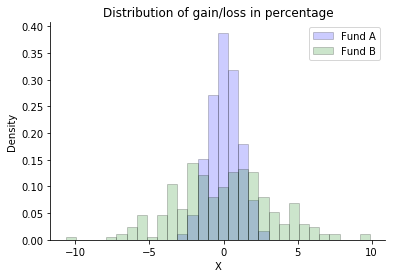

In [333]:
#Q1(b)
#set the y-axis to density instead of frequency
df.plot.hist(bins=30,alpha=0.2,edgecolor="black",density=True,color=['b','g']) 

#named the title, x-axis and y-axis
pl.title('Distribution of gain/loss in percentage') 
pl.xlabel('X')
pl.ylabel('Density')

plt.show()


In [330]:
#Mean and Variance of Fund A and B in 2019 for 252 days
column_data = df.iloc[:,[0,1]]

mean_AB = np.mean(column_data) 
var_AB = np.var(column_data)

print("Mean for fund A and B:")
print(mean_AB)
print("\n")
print("Variance for fund A and B:")
print(var_AB)

Mean for fund A and B:
Fund A    0.059319
Fund B    0.048697
dtype: float64


Variance for fund A and B:
Fund A     1.075422
Fund B    10.547832
dtype: float64


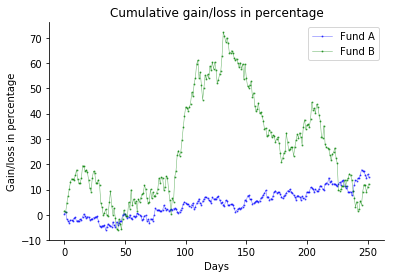

In [310]:
#Q1(c)
#plot the cumulative gain/loss to see what happened if an investor owns a fund from the first day of a year 
#to the last day of a year
df_cum = df.cumsum()
df_cum.plot(alpha=0.6,marker='.', color=['b','g'],markersize=2,linewidth=0.5)

#named the title, x-axis and y-axis
pl.title('Cumulative gain/loss in percentage') 
pl.xlabel('Days')
pl.ylabel('Gain/loss in percentage')
plt.show()

In [332]:
# Q2
#get the t stats and p value based on Null Hypithesis
# Hypothesis Test: H0: mean equal
tstats = stats.ttest_ind(df['Fund A'],df['Fund B']) 
print("T test for H0: mean(A) = mean(B):")
print(tstats)

#Decision of rejecting H0 or not
print("\n")
print("Whether reject H0 or not:")
if tstats[1]>=0.05:
    print("Do not reject H0.")
else:
    print("Reject H0.")


T test for H0: mean(A) = mean(B):
Ttest_indResult(statistic=0.049362132950207145, pvalue=0.9606503380102615)


Whether reject H0 or not:
Do not reject H0.


In [293]:
# Q3
# Annualized Rate of Return of fund A by Manager 1
# Formula = (0.01*r1+1)*...*(0.01*r252+1)-1

product = 1
for i in range(252):
    product = (df.iloc[i,0]*0.01 + 1) * product 
    # products of (0.01*r + 1)
    
Ann_A = product - 1 # total products minus 1
print("Annualized Rate of turn:", Ann_A)


Annualized Rate of turn: 0.14557313230845415


In [294]:
# Annualized Rate of Return of fund B by Manager 2
# Formula = (0.01*r1+1)*...*(0.01*r252+1)-1

product = 1
for i in range(252):
    product = (df.iloc[i,1] * 0.01 + 1) * product
    # products of (0.01*r + 1)
    
Ann_B = product - 1 # total products minus 1
print("Annualized Rate of Return:", Ann_B)


Annualized Rate of Return: -0.010027119803912576
